#importação

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import random
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn

##01 - leitura da base de dados

In [ ]:
resultado_doenca = pd.read_excel("doenca_cardiaca.xlsx")
resultado_doenca.head()

,idade,sexo,tp_dor,pressao,colesterol,glicemia,result_eletro_parado,freq_max,exam_exerc,pico_antigo,inclinacao_exerc,nr_vasos,talassemia_result,doenca_cardiaca
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


##02 - tratamento de dados

In [ ]:
data1 = resultado_doenca[resultado_doenca['talassemia_result']>= 1]
data2 = data1[data1['nr_vasos'] >= 1]

foram removidos os valores que estavam zerados

##03 - visualização de dados

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


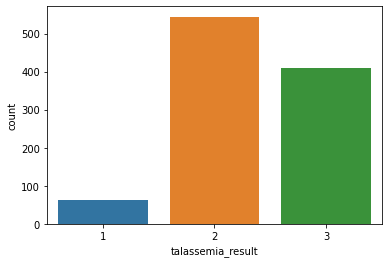

In [ ]:
sns.countplot(data1['talassemia_result'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


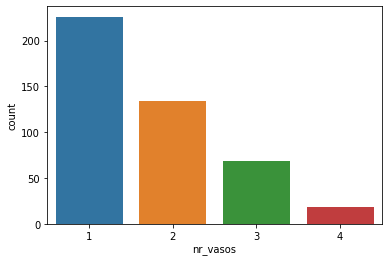

In [ ]:
sns.countplot(data2['nr_vasos'])

In [ ]:
matrix_corr = resultado_doenca.corr()
print(matrix_corr["doenca_cardiaca"].sort_values(ascending=False))

doenca_cardiaca         1.000000
tp_dor                  0.434854
freq_max                0.422895
inclinacao_exerc        0.345512
result_eletro_parado    0.134468
glicemia               -0.041164
colesterol             -0.099966
pressao                -0.138772
idade                  -0.229324
sexo                   -0.279501
talassemia_result      -0.337838
nr_vasos               -0.382085
exam_exerc             -0.438029
pico_antigo            -0.438441
Name: doenca_cardiaca, dtype: float64


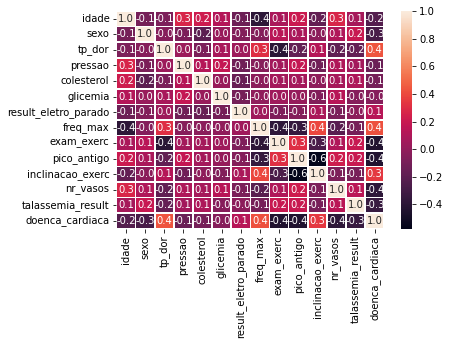

In [ ]:
plot = sn.heatmap(matrix_corr, annot = True, fmt=".1f", linewidths=.6)
plot

##04 - Protocolo experimental

In [ ]:
seed = 5
test_size = 0.3

features = resultado_doenca.columns[:-1]

x = resultado_doenca[features]
y = resultado_doenca['doenca_cardiaca']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.3)

print(x_train.shape)
print(x_val.shape)

(717, 13)
(308, 13)
